# MSc Thesis - Hugo Stam

### Chapter 3.2 - Investment simulation
Below the figures included in Chapter 3.2 are presented.  

In [1]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns
sns.set(style="ticks")

 ### Figure 3.2: Capacity planning including the cargo projection with a growth in demand over time


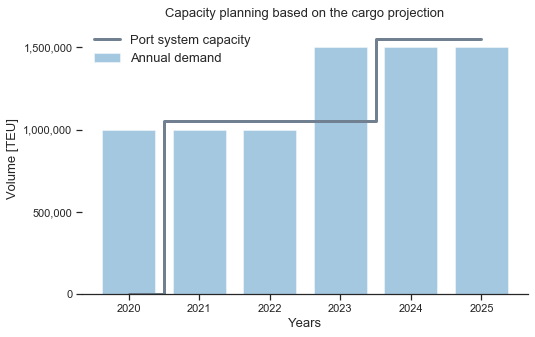

In [2]:
# example data
years    = [2020, 2021, 2022, 2023, 2024, 2025]
capacity = [0, 1_050_000, 1_050_000, 1_050_000, 1_550_000, 1_550_000]
demand   = [1_000_000, 1_000_000, 1_000_000, 1_500_000, 1_500_000, 1_500_000]

# figure 
plt.figure(figsize=(8,5))

# plot
plt.step(years, capacity, color='slategray', linewidth=3, where ='mid',label="Port system capacity", zorder=2)
plt.bar(years, demand, color='tab:blue', width = 0.75, alpha=0.4, label="Annual demand", zorder=1)

# labels
plt.title('Capacity planning based on the cargo projection', fontsize=13)
plt.ylim(0,1_650_000)
plt.yticks([0, 0.5e6, 1e6, 1.5e6], ['0', '500,000', '1,000,000', '1,500,000'])   
plt.xlabel("Years", fontsize=13)
plt.ylabel('Volume [TEU]', fontsize=13)
plt.legend(loc='upper left', fontsize=13, frameon=False)

sns.despine(left=True)
plt.savefig("SaveFigures/examples/cargo_projection.png", bbox_inches = 'tight')

In [3]:
# # example data
# years    = [2020, 2021, 2022, 2023, 2024, 2025]
# capacity = [0, 1_000_000, 1_000_000, 1_000_000, 1_500_000, 1_500_000]
# demand   = [1_000_000, 1_000_000, 1_000_000, 1_500_000, 1_500_000, 1_500_000]

# # figure 
# plt.figure(figsize=(8,5))

# # plot
# plt.bar(years, capacity, color='tab:blue', alpha=0.4, width=0.6, label="Port system capacity", zorder=2)
# plt.step(years, demand, where='mid', color='slategray', linewidth=2.5, label="Annual demand", zorder=4)

# # labels
# plt.title('Capacity planning based on the cargo projection', fontsize=13)
# plt.ylim(0, 1_650_000)
# plt.yticks([0, 0.5e6, 1e6, 1.5e6], ['0', '500,000', '1,000,000', '1,500,000'])   
# plt.xlabel("Date (years)", fontsize=13)
# plt.ylabel('Volume [TEU]', fontsize=13)
# plt.legend(loc='upper left', fontsize=13, frameon=False)
# sns.despine(left=True)

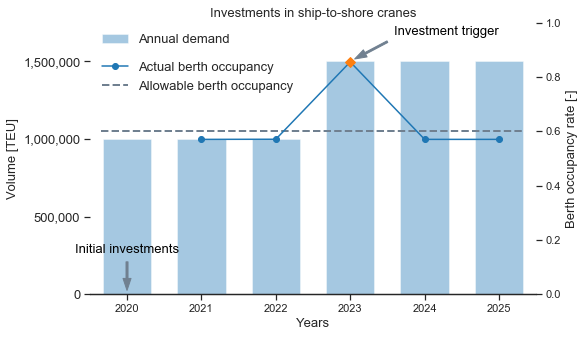

In [4]:
occupancy_rate = [0.570, 0.5705, 0.855, 0.570, 0.570, 0.570]
trigger = 0.570 * 1.5

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Investments in ship-to-shore cranes', fontsize=13)
ax1.bar(years, demand, color='tab:blue', width = 0.65, alpha=0.4, label="Annual demand", zorder=1)

ax1.annotate("Initial investments", xy=(2020, 10), xytext=(2020, 250_000), color='black', 
             arrowprops=dict(facecolor='slategray', edgecolor='slategray', 
                             headwidth=8, width=2, shrink=0.1), 
             horizontalalignment='center', verticalalignment='bottom', fontsize=13)
ax1.annotate("Investment trigger", xy=(2023, 1_500_000), xytext=(2025, 1_650_000), color='black',
             arrowprops=dict(facecolor='slategray', edgecolor='slategray', 
                             headwidth=8, width=1.8, shrink=0.1),
             horizontalalignment='right', verticalalignment='bottom', fontsize=13)

ax1.set_yticks([0,500_000,1_000_000,1_500_000])
ax1.set_yticklabels(["0","500,000","1,000,000","1,500,000"], fontsize=13)
ax1.set_ylim(0,1_750_000)
ax1.set_xlabel("Years", fontsize=13)
ax1.set_xlim(2019.5,2025.5)
ax1.set_ylabel('Volume [TEU]', fontsize=13)
ax1.legend(loc='upper left', fontsize=13,  bbox_to_anchor=(0, 1), framealpha=False)

# Investment triggers
ax2 = ax1.twinx()
ax2.plot(years[1:6], occupancy_rate[0:5], marker='o', color='tab:blue', label='Actual berth occupancy')
ax2.plot(years[3], trigger, 'D', markersize=7, color='tab:orange', zorder=10)

ax2.axhline(0.6, 0.025, 0.975, linestyle='--', linewidth=2, color='slategray', label='Allowable berth occupancy', zorder=1)

ax2.set_ylim(0, 1)
ax2.set_ylabel('Berth occupancy rate [-]', fontsize=13)
ax2.legend(loc='upper left', fontsize=13, bbox_to_anchor=(0, 0.90), framealpha=False)

sns.despine(left=True)
plt.savefig("SaveFigures/examples/example_investment_triggers.png", bbox_inches = 'tight')

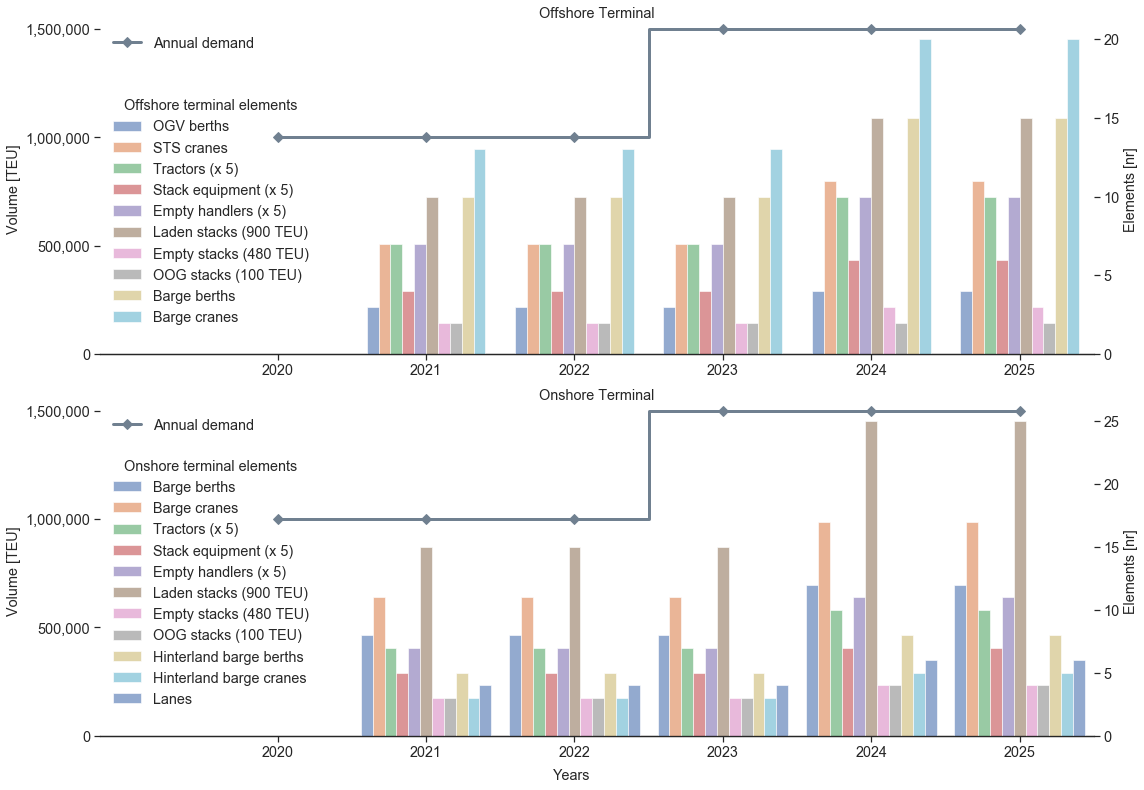

In [5]:
def example_terminal_elements(width=0.08, alpha=0.6):

    years = [2020, 2021, 2022, 2023, 2024, 2025]
    demand = [1_000_000, 1_000_000, 1_000_000, 1_500_000, 1_500_000, 1_500_000]
    capacity = [0, 1_050_000, 1_050_000, 1_050_000, 1_550_000, 1_550_000]
    
    OGV_berths = [0, 3, 3, 3, 4, 4]
    OGV_cranes = [0, 7, 7, 7, 11, 11]
    off_tractor = [0, 35, 35, 35, 50, 50]
    off_laden_stack = [0, 10, 10, 10, 15, 15]
    off_empty_stack = [0, 2, 2, 2, 3, 3]
    off_oog_stack = [0, 2, 2, 2, 2, 2]
    off_stack_equipment = [0, 20, 20, 20, 30, 30]
    off_empty_handler = [0, 35, 35, 35, 50, 50]
    off_barge_berths = [0, 10, 10, 10, 15, 15]
    off_barge_cranes = [0, 13, 13, 13, 20, 20]

    on_barge_berths = [0, 8, 8, 8, 12, 12]
    on_barge_cranes = [0, 11, 11, 11, 17, 17]
    on_tractor = [0, 35, 35, 35, 50, 50]
    on_laden_stack = [0, 15, 15, 15, 25, 25]
    on_empty_stack = [0, 3, 3, 3, 4, 4]
    on_oog_stack = [0, 3, 3, 3, 4, 4]
    on_stack_equipment = [0, 25, 25, 25, 35, 35]
    on_empty_handler = [0, 35, 35, 35, 55, 55]
    on_hinterland_berths = [0, 5, 5, 5, 8, 8]
    on_hinterland_cranes = [0, 3, 3, 3, 5, 5]
    on_gates = [0, 4, 4, 4, 6, 6]

    off_tractor = [x / 5 for x in off_tractor]
    off_stack_equipment = [x / 5 for x in off_stack_equipment]
    off_empty_handler = [x / 5 for x in off_empty_handler]
    on_tractor = [x / 5 for x in on_tractor]
    on_stack_equipment = [x / 5 for x in on_stack_equipment]
    on_empty_handler = [x / 5 for x in on_empty_handler]
    
    fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 11))
    
    # Offshore
    ax1.set_title('Offshore Terminal', fontsize='x-large')

    ax1.step(years, demand, where='mid', linewidth=3, color='slategray', marker='D', markersize=7,
             label='Annual demand', zorder=5000)    
    # ax1.step(years, capacity, where='mid', linewidth=3, color='slategray',
    #          label='Port system cpacity', zorder=5000)
    
    ax1.set_ylim(0,)
    ax1.set_ylabel('Volume [TEU]', fontsize='x-large')
    ax1.grid(False, which='major')

    ax1.set_yticks([0,500_000,1_000_000,1_500_000])
    ax1.set_yticklabels(["0","500,000","1,000,000","1,500,000"], fontsize='x-large')
    ax1.legend(loc='upper left', framealpha=False, bbox_to_anchor=(0, 1), fontsize='x-large')
       
    ax1.set_xlim(2018.8, 2025.5)
    ax1.set_xticks([x for x in years])
    ax1.set_xticklabels(years, fontsize='x-large')
        
    ax3 = ax1.twinx()

    ax3.bar([x - 4.5 * width for x in years], OGV_berths, width=width, alpha=alpha, label="OGV berths")
    ax3.bar([x - 3.5 * width for x in years], OGV_cranes, width=width, alpha=alpha, label="STS cranes")
    ax3.bar([x - 2.5 * width for x in years], off_tractor, width=width, alpha=alpha, label="Tractors (x 5)")
    ax3.bar([x - 1.5 * width for x in years], off_stack_equipment, width=width, alpha=alpha, label="Stack equipment (x 5)")
    ax3.bar([x - 0.5 * width for x in years], off_empty_handler, width=width, alpha=alpha, label="Empty handlers (x 5)")
    ax3.bar([x + 0.5 * width for x in years], off_laden_stack, width=width, alpha=alpha, label="Laden stacks (900 TEU)")
    ax3.bar([x + 1.5 * width for x in years], off_empty_stack, width=width, alpha=alpha, label="Empty stacks (480 TEU)")
    ax3.bar([x + 2.5 * width for x in years], off_oog_stack, width=width, alpha=alpha, label="OOG stacks (100 TEU)")
    ax3.bar([x + 3.5 * width for x in years], off_barge_berths, width=width, alpha=alpha, label="Barge berths")
    ax3.bar([x + 4.5 * width for x in years], off_barge_cranes, width=width, alpha=alpha, label="Barge cranes")
 
    ax3.set_yticks([0, 5, 10, 15, 20])
    ax3.set_yticklabels([0, 5, 10, 15, 20], fontsize='x-large')
    ax3.set_ylabel('Elements [nr]', fontsize='x-large')

    ax3.legend(loc='lower left', framealpha=False, bbox_to_anchor=(0, 0.05, 0, 0),
               fontsize='x-large', title="Offshore terminal elements", title_fontsize='x-large')
    
    # Onshore
    ax2.step(years, demand, where='mid', linewidth=3, color='slategray', marker='D', markersize=7,
             label='Annual demand', zorder=5000)    
    
    ax2.set_ylim(0,)
    ax2.set_ylabel('Volume [TEU]', fontsize='x-large')
    ax2.grid(False, which='major')

    ax2.set_yticks([0,500_000,1_000_000,1_500_000])
    ax2.set_yticklabels(["0","500,000","1,000,000","1,500,000"], fontsize='x-large')
    ax2.legend(loc='upper left', framealpha=False, bbox_to_anchor=(0, 1), fontsize='x-large')
    
    ax2.set_title('Onshore Terminal', fontsize='x-large')
    ax2.set_xlim(2018.8, 2025.5)
    ax2.set_xticks([x for x in years])
    ax2.set_xticklabels(years, fontsize='x-large')
    ax2.xaxis.set_label_coords(0.475, -0.1)
    ax2.set_xlabel('Years', fontsize='x-large')

    ax3 = ax2.twinx()
    
    ax3.bar([x - 5.0 * width for x in years], on_barge_berths, width=width, alpha=alpha, label="Barge berths")
    ax3.bar([x - 4.0 * width for x in years], on_barge_cranes, width=width, alpha=alpha, label="Barge cranes")
    ax3.bar([x - 3.0 * width for x in years], on_tractor, width=width, alpha=alpha, label="Tractors (x 5)")
    ax3.bar([x - 2.0 * width for x in years], on_stack_equipment, width=width, alpha=alpha, label="Stack equipment (x 5)")
    ax3.bar([x - 1.0 * width for x in years], on_empty_handler, width=width, alpha=alpha, label="Empty handlers (x 5)")
    ax3.bar([x + 0.0 * width for x in years], on_laden_stack, width=width, alpha=alpha, label="Laden stacks (900 TEU)")
    ax3.bar([x + 1.0 * width for x in years], on_empty_stack, width=width, alpha=alpha, label="Empty stacks (480 TEU)")
    ax3.bar([x + 2.0 * width for x in years], on_oog_stack, width=width, alpha=alpha, label="OOG stacks (100 TEU)")
    ax3.bar([x + 3.0 * width for x in years], on_hinterland_berths, width=width, alpha=alpha, label="Hinterland barge berths")
    ax3.bar([x + 4.0 * width for x in years], on_hinterland_cranes, width=width, alpha=alpha, label="Hinterland barge cranes")
    ax3.bar([x + 5.0 * width for x in years], on_gates, width=width, alpha=alpha, label="Lanes")
    
    ax3.set_ylabel('Elements [nr]', fontsize='x-large')
    ax3.set_yticks([0, 5, 10, 15, 20, 25])
    ax3.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize='x-large')

    ax3.legend(loc='lower left', framealpha=False, bbox_to_anchor=(0, 0.05, 0, 0),
               fontsize='x-large', title="Onshore terminal elements", title_fontsize='x-large')
    
    fig.tight_layout()

    ax1.grid(False, which='major')
    ax2.grid(False, which='major')
    
    sns.despine(left=True)
    
example_terminal_elements()

plt.savefig("SaveFigures/examples/example_terminal_elements.png", bbox_inches = 'tight')

In [6]:
def example_cashflow_plot(width=0.35, alpha=0.75):

    years = [2020, 2021, 2022, 2023, 2024, 2025]

    capex = [450, 0, 0, 200, 0, 0]
    opex = [0, 115, 105, 95, 155, 145]
    
    data = {'Capex': capex,
            'Opex': opex}
    data_df = pd.DataFrame(data)

    costs = (data_df['Capex'].values + data_df['Opex'].values)
    costs_cum = np.cumsum(costs)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    bar1 = ax1.bar([x - 0.5 * width for x in years],
                   capex, width=width, color='tab:blue', alpha=alpha, label="Capex")
    bar2 = ax1.bar([x + 0.5 * width for x in years], 
                   opex, width=width, color='darkcyan', alpha=alpha, label="Opex")
    
    ax1.annotate("Investments", xy=(2020, 450), xytext=(2021, 480), color='black',
             arrowprops=dict(facecolor='slategray', edgecolor='slategray', 
                             headwidth=8, width=2, shrink=0.1),
             horizontalalignment='center', verticalalignment='bottom', fontsize=13)
    ax1.annotate("Investments", xy=(2023, 200), xytext=(2024, 230), color='black',
             arrowprops=dict(facecolor='slategray', edgecolor='slategray', 
                             headwidth=8, width=2, shrink=0.1),
             horizontalalignment='center', verticalalignment='bottom', fontsize=13)

    ax2 = ax1.twinx()
    steps, = ax2.step(years, costs_cum, label="Cumulative costs", linewidth=2, where='mid', color='tab:gray')
    PV, = ax2.plot(years[5], costs_cum[5], 'D', label="PV of the costs",  color='tab:gray')
    
    ax1.set_title('Time series annual costs', fontsize=13)
    ax1.set_xlabel('Years', fontsize='large')
    ax1.set_ylabel('Annual costs [US$]', fontsize='large')
    ax1.set_yticks([0, 100, 200, 300, 400, 500])
    ax1.set_yticklabels(["", "$ 100M", "$ 200M", "$ 300M", "$ 400M", "$ 500M"], fontsize=13)
    ax1.set_xticks([x for x in years])
    ax1.set_xticklabels(years, fontsize=13)

    ax2.set_ylabel('PV of the costs [US$]', fontsize=13)
    ax2.set_yticks([0, 250, 500, 750, 1000, 1250, 1500])
    ax2.set_yticklabels(["", "$ 250M", "$ 500M", "$ 750M", "$ 1,000M", "$ 1,250M", "$ 1,500M"], fontsize=13)
    
    first_leg = ax2.legend(handles=[steps, PV], loc='lower right', framealpha=False, 
                           bbox_to_anchor=(1, 1), fontsize=13)
    add_first_leg = plt.gca().add_artist(first_leg)

    ax2.legend(handles=[bar1, bar2], loc='lower left', framealpha=False, bbox_to_anchor=(0, 1), fontsize=13)

    fig.tight_layout()
    
    sns.despine(left=True)

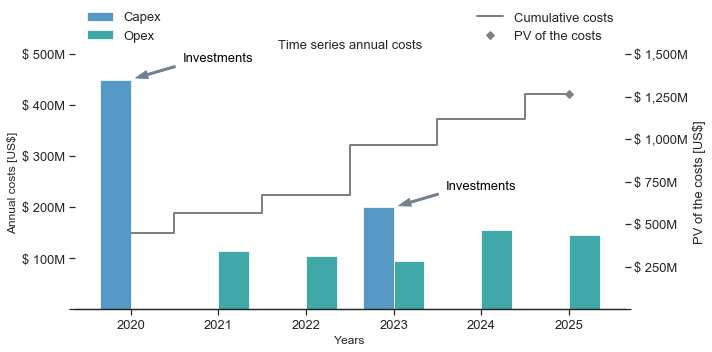

In [7]:
example_cashflow_plot()

plt.savefig("SaveFigures/examples/example_annual_costs.png", bbox_inches = 'tight')